In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('Rat_Sightings.csv')

In [3]:
data = data.sample(frac=0.1, random_state=200)
data = data.iloc[:, 23:26]
data.shape

(10191, 3)

In [4]:
# for i in range(0,len(data)):
#     print(data.iloc[i,0])

In [5]:
#pega os dados do data set
list1=list(data['X Coordinate (State Plane)'])
list2=list(data['Y Coordinate (State Plane)'])

#transforma os dados em uma lista conjunta
X = zip(list1,list2)
dt=np.dtype('int')
listaSemNaN=[]
X=list(X)

#remove dessa lista valores que causam erros por não serem numeros
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        listaSemNaN.append(tup)
        
#Transforma em um NP.Array para realizar contas matematicas da blibioteca numpy
X = np.array(listaSemNaN,dtype=dt)

In [6]:
#data [data['Borough'] == 'BROOKLYN']
real_labels = [];

# for i in range(0,len(data)):
#     #print(data.iloc[i,0])
#     if(data.iloc[i,0] == 'BROOKLYN'):
#         real_labels.append(0);
#     elif(data.iloc[i,0] == 'MANHATTAN') :
#         real_labels.append(1);
#     elif(data.iloc[i,0] == 'BRONX') :
#         real_labels.append(2);
#     elif(data.iloc[i,0] == 'STATEN ISLAND') :
#         real_labels.append(3);
#     elif(data.iloc[i,0] == 'QUEENS') :
#         real_labels.append(4);

for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        if(data.iloc[i,0] == 'BROOKLYN'):
            real_labels.append(0);
        elif(data.iloc[i,0] == 'MANHATTAN') :
            real_labels.append(2);
        elif(data.iloc[i,0] == 'BRONX') :
            real_labels.append(1);
        elif(data.iloc[i,0] == 'STATEN ISLAND') :
            real_labels.append(3);
        elif(data.iloc[i,0] == 'QUEENS') :
            real_labels.append(4);
        
len(real_labels)

10117

In [7]:
print real_labels


[0, 0, 2, 0, 2, 1, 0, 1, 3, 0, 1, 0, 0, 1, 2, 0, 2, 4, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 3, 2, 1, 0, 1, 3, 1, 1, 0, 2, 4, 2, 2, 2, 4, 4, 4, 0, 1, 1, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 4, 0, 0, 2, 2, 4, 1, 0, 4, 0, 4, 1, 0, 1, 0, 1, 0, 2, 4, 0, 2, 0, 1, 1, 1, 4, 0, 1, 0, 2, 4, 1, 0, 4, 0, 0, 1, 4, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 4, 0, 2, 0, 2, 1, 1, 1, 4, 1, 2, 0, 0, 2, 0, 0, 4, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 0, 4, 1, 2, 4, 0, 2, 4, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 2, 2, 0, 4, 1, 2, 1, 3, 1, 2, 0, 4, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 4, 0, 1, 0, 1, 1, 1, 1, 1, 2, 4, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 4, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 4, 1, 0, 4, 2, 2, 4, 0, 0, 1, 0, 1, 2, 4, 2, 2, 1, 4, 2, 0, 2, 0, 2, 0, 2, 3, 0, 0, 2, 4, 2, 0, 4, 2, 0, 2, 4, 2, 2, 1, 2, 4, 0, 1, 3, 1, 1, 0, 3, 0, 1, 0, 2, 0, 0, 4, 4, 1, 4, 1, 1, 0, 4, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 4, 4, 1, 

In [8]:
scores = []
labels = []
#range_values = np.arange(2, 4)

('\nNumber of clusters =', 5)
('Silhouette score =', 0.4713811096660234)
('Labels =', array([4, 4, 1, ..., 4, 3, 0]))


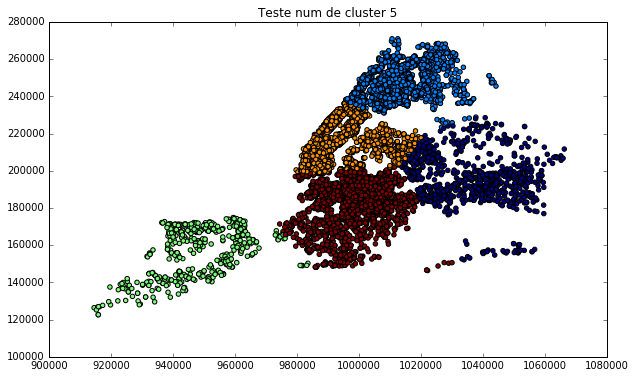

In [9]:

kmeans = KMeans(init= 'k-means++', n_clusters=5, n_init=10)
teste = kmeans.fit_predict(X)
score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(real_labels))
label = kmeans.labels_

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.title("Teste num de cluster "+str(5))
    
print('\nNumber of clusters =', 5)
print('Silhouette score =', score)
print('Labels =', label)
    
scores.append(score)
labels.append(label)

In [10]:
df = pd.DataFrame({"x":np.array(X[:, 0]).flatten(), 
                   "y":np.array(X[:, 1]).flatten(), 
                   "colors":np.array(labels[0]).flatten()})

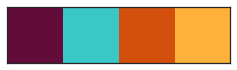

In [11]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

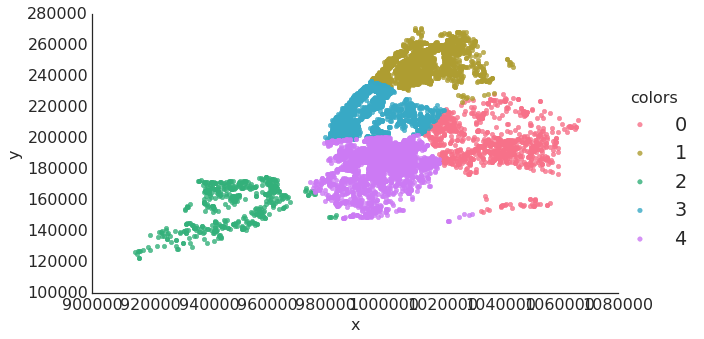

In [12]:
#plot data with seaborn
facet = sns.lmplot(data=df, x='x', y='y', hue='colors', size=5, aspect=1.8,
                   fit_reg=False, legend=True, legend_out=True)

In [13]:
print list(labels)


[array([4, 4, 1, ..., 4, 3, 0])]


In [14]:
teste=list(labels[0])

In [15]:
%pprint

Pretty printing has been turned OFF


In [16]:
teste

[4, 4, 1, 4, 3, 1, 4, 1, 2, 4, 1, 4, 4, 1, 3, 4, 3, 4, 4, 3, 1, 4, 4, 3, 3, 4, 4, 3, 1, 3, 0, 3, 1, 3, 4, 4, 4, 1, 1, 1, 4, 2, 1, 1, 4, 1, 2, 1, 1, 4, 3, 0, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 3, 4, 1, 3, 4, 4, 4, 1, 4, 0, 4, 4, 4, 3, 0, 1, 4, 3, 4, 0, 1, 4, 1, 4, 1, 4, 3, 0, 4, 3, 4, 1, 1, 1, 3, 4, 1, 4, 3, 0, 1, 4, 3, 4, 4, 1, 0, 1, 4, 4, 4, 4, 3, 3, 4, 3, 3, 1, 4, 3, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 3, 3, 1, 1, 0, 4, 3, 4, 3, 1, 1, 1, 0, 1, 3, 4, 4, 3, 4, 4, 0, 3, 4, 4, 3, 1, 1, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 0, 4, 0, 1, 1, 0, 4, 3, 0, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 1, 3, 4, 3, 1, 1, 1, 2, 1, 3, 4, 4, 1, 4, 1, 4, 1, 3, 3, 3, 3, 0, 4, 1, 4, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 4, 3, 1, 1, 4, 4, 4, 3, 4, 0, 4, 3, 3, 3, 3, 4, 1, 3, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 3, 1, 0, 3, 1, 3, 0, 4, 4, 1, 4, 1, 4, 0, 1, 3, 1, 0, 3, 4, 3, 4, 1, 4, 3, 2, 2, 4, 1, 0, 3, 4, 0, 1, 4, 1, 0, 3, 1, 3, 3, 4, 1, 2, 1, 1, 4, 2, 4, 1, 4, 3, 4, 4, 0, 0, 1, 4, 1, 1, 4, 1, 1, 1, 3, 3, 3, 1, 4, 1, 1, 3, 4, 0, 0, 1, 3, 3, 3, 

In [17]:
real_labels

[0, 0, 2, 0, 2, 1, 0, 1, 3, 0, 1, 0, 0, 1, 2, 0, 2, 4, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 4, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 3, 2, 1, 0, 1, 3, 1, 1, 0, 2, 4, 2, 2, 2, 4, 4, 4, 0, 1, 1, 2, 0, 0, 1, 4, 0, 0, 0, 1, 0, 4, 0, 0, 2, 2, 4, 1, 0, 4, 0, 4, 1, 0, 1, 0, 1, 0, 2, 4, 0, 2, 0, 1, 1, 1, 4, 0, 1, 0, 2, 4, 1, 0, 4, 0, 0, 1, 4, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 4, 0, 2, 0, 2, 1, 1, 1, 4, 1, 2, 0, 0, 2, 0, 0, 4, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 0, 4, 1, 2, 4, 0, 2, 4, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 2, 2, 0, 4, 1, 2, 1, 3, 1, 2, 0, 4, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 4, 0, 1, 0, 1, 1, 1, 1, 1, 2, 4, 0, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 4, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 4, 1, 0, 4, 2, 2, 4, 0, 0, 1, 0, 1, 2, 4, 2, 2, 1, 4, 2, 0, 2, 0, 2, 0, 2, 3, 0, 0, 2, 4, 2, 0, 4, 2, 0, 2, 4, 2, 2, 1, 2, 4, 0, 1, 3, 1, 1, 0, 3, 0, 1, 0, 2, 0, 0, 4, 4, 1, 4, 1, 1, 0, 4, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 4, 4, 1, 

In [18]:
len(labels[0])

10117

In [19]:
metrics.adjusted_mutual_info_score(real_labels,teste)  

0.00033523761163792553

IndentationError: expected an indented block (<ipython-input-20-f3322435d774>, line 2)